In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Hello, what filter would you like to use today?
Please press 0 to Take a Picture
Please press 1 to Use a Stored Photo
Please note that video is currently unsupported for this platform
1
Please input the location of the photo and its name
For example: /content/drive/My Drive/Python_Project/final.png
/content/drive/My Drive/Python_Project/final.png
Please press 1 for Crazy Eyes
Please press 2 for Sunglasses
Please press 3 for Forehead Glasses
Please press 4 for Mustache
Please press 5 to See if A Mask is Needed
Please press 6 to Sharpen a Photo
Please press 7 to Emboss a Photo
Please press 8 to Swap a Photo
Please press 9 to Contour a Photo
Please press 10 to Edge Detect a Photo
10


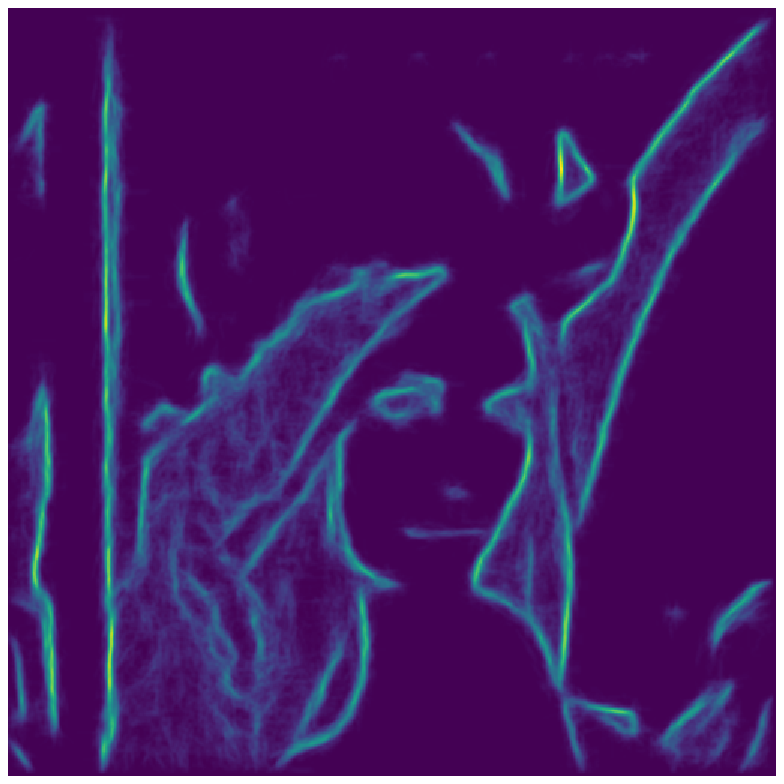

In [18]:
import imutils
import numpy as np
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image, ImageDraw, ImageFilter
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import imageio
import higra as hg

try:
    from utils import * # imshow, locate_resource, get_sed_model_file
except: # we are probably running from the cloud, try to fetch utils functions from URL
    import urllib.request as request; exec(request.urlopen('https://github.com/higra/Higra-Notebooks/raw/master/utils.py').read(), globals())
    
 
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')
mouth_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')


## Simple Face and Eye Detection Start
#~~
#~~~~~~~~~~~~~~~~~~~~~~~~Crazy Eyes~~~~~~~~~~~~~~~~~~~~~~~~~~~
def Crazy_Eyes():
  img = cv2.imread("/content/drive/My Drive/Python_Project/photo.png")
  imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
 
  face = face_cascade.detectMultiScale(imgGray,1.1,4)
  eyes = eye_cascade.detectMultiScale(imgGray,1.1,4)
  ## find image to overlay
  ## resize it to w,h values
  ## print it on the picture at x,y coordinates
  ## done
  ##from PIL import Image, ImageDraw, ImageFilter

  #~~~~~~~~~~~~~~~~~~~~~~~~~Insert Picture~~~~~~~~~~~~~~~~~~
  im1 = Image.open("/content/drive/My Drive/Python_Project/photo.png").convert('RGBA')
  back_im = im1.copy()
 
  #~~~~~~~~~~~~~~~~~~~~~~~~~ Apply Filter~~~~~~~~~~~~~~~~~~~~~~~~~
  

  im2 = Image.open("/content/drive/My Drive/Python_Project/eye2.png").convert('RGBA')
  ## Resize Image on Left Eye Size using width and height
  new_image = im2.resize((eyes[[0],[2]], eyes[[0],[3]]))
  ## Resize Image on Right Eye Size
  new_image2 = im2.resize((eyes[[1],[2]], eyes[[1],[3]]))
  ## Left Eye Pasted at x = eye 0,0 and y = eyes 0,1
  back_im.paste(new_image, (eyes[[0],[0]], eyes[[0],[1]]), mask = new_image)
  ## Right Eye Pasted
  back_im.paste(new_image2, (eyes[[1],[0]], eyes[[1],[1]]), mask = new_image2)
  ## Save image
  back_im.save("/content/drive/My Drive/Python_Project/final.png", quality=95)
  
  ##Display image
  img = cv2.imread("/content/drive/My Drive/Python_Project/final.png")  
  cv2_imshow(img) 
 
 
#~~~~~~~~~~~~~~~~~~~~~ Glasses over Eyes~~~~~~~~~~~~~~~~~~~~~~
def Glasses_Eyes():
  img = cv2.imread("/content/drive/My Drive/Python_Project/photo.png")
  imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
 
  face = face_cascade.detectMultiScale(imgGray,1.1,4)
  eyes = eye_cascade.detectMultiScale(imgGray,1.1,4)
  ## find image to overlay
  ## resize it to w,h values
  ## print it on the picture at x,y coordinates
  ## done
  ##from PIL import Image, ImageDraw, ImageFilter
 
  #~~~~~~~~~~~~~~~~~~~~~~~~~Insert Picture~~~~~~~~~~~~~~~~~~
  im1 = Image.open("/content/drive/My Drive/Python_Project/photo.png").convert('RGBA')
  back_im = im1.copy()
 
 
  #~~~~~~~~~~~~~~~~~~~~~~~~~ Apply Filter~~~~~~~~~~~~~~~~~~~~~~~~~
  im3 = Image.open("/content/drive/My Drive/Python_Project/glass.png").convert('RGBA')
  ## Resize Image of glasses, width being whole face, height being right eye height
  new_image3 = im3.resize((face[[0],[2]], eyes[[1],[3]]))
  ## Glasses pasted at x = mid face and y = height of left eye
  back_im.paste(new_image3, (face[[0],[0]], eyes[[1],[1]]), mask = new_image3)
  ## Save image
  back_im.save("/content/drive/My Drive/Python_Project/final.png", quality=95)
  
  ##Display image
  img = cv2.imread("/content/drive/My Drive/Python_Project/final.png")  
  cv2_imshow(img) 
 
#~~~~~~~~~~~~~~~~~~~~~~Glasses on Forehead~~~~~~~~~~~~~~~~~~~
def Glasses_Forehead():
  img = cv2.imread("/content/drive/My Drive/Python_Project/photo.png")
  imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
 
  face = face_cascade.detectMultiScale(imgGray,1.1,4)
  eyes = eye_cascade.detectMultiScale(imgGray,1.1,4)
  ## find image to overlay
  ## resize it to w,h values
  ## print it on the picture at x,y coordinates
  ## done
  ##from PIL import Image, ImageDraw, ImageFilter
 
  #~~~~~~~~~~~~~~~~~~~~~~~~~Insert Picture~~~~~~~~~~~~~~~~~~
  im1 = Image.open("/content/drive/My Drive/Python_Project/photo.png").convert('RGBA')
  back_im = im1.copy()
 
  #~~~~~~~~~~~~~~~~~~~~~~~~~ Apply Filter~~~~~~~~~~~~~~~~~~~~~~~~~
  im4 = Image.open("/content/drive/My Drive/Python_Project/glass.png").convert('RGBA')
  ## Resize Image of glasses, width being whole face, height being right eye height
  new_image4 = im4.resize((face[[0],[2]], eyes[[1],[3]]))
  ## Glasses pasted at x = mid face and y = height
  back_im.paste(new_image4, (face[[0],[0]], face[[0],[1]]), mask = new_image4)
  ## Save image
  back_im.save("/content/drive/My Drive/Python_Project/final.png", quality=95)
 
  ##Display image
  img = cv2.imread("/content/drive/My Drive/Python_Project/final.png")  
  cv2_imshow(img) 
 
#~~~~~~~~~~~~~~~~~~~~~~Mustache~~~~~~~~~~~~~~~~~~~
def Mustache():
  img = cv2.imread("/content/drive/My Drive/Python_Project/photo.png")
  imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
 
  face = face_cascade.detectMultiScale(imgGray,1.1,4)
  eyes = eye_cascade.detectMultiScale(imgGray,1.1,4)
  ## find image to overlay
  ## resize it to w,h values
  ## print it on the picture at x,y coordinates
  ## done
  ##from PIL import Image, ImageDraw, ImageFilter
 
  #~~~~~~~~~~~~~~~~~~~~~~~~~Insert Picture~~~~~~~~~~~~~~~~~~
  im1 = Image.open("/content/drive/My Drive/Python_Project/photo.png").convert('RGBA')
  back_im = im1.copy()
 
  #~~~~~~~~~~~~~~~~~~~~~~~~~ Apply Filter~~~~~~~~~~~~~~~~~~~~~~~~~
  im5 = Image.open("/content/drive/My Drive/Python_Project/mustache.png").convert('RGBA')
  ## Resize Image of mustache, width being whole face, height being right eye height
  new_image5 = im5.resize((face[[0],[2]], eyes[[1],[3]]))
  ## Glasses pasted at x = mid face and y = height of mid face + (width of rectangle / 1.5)
  back_im.paste(new_image5, (face[[0],[0]], (face[[0],[1]] + (face[[0],[2]]) / 1.7)), mask = new_image5)
  ## Save image
  back_im.save("/content/drive/My Drive/Python_Project/final.png", quality=95)
 
  ##Display image
  img = cv2.imread("/content/drive/My Drive/Python_Project/final.png")  
  cv2_imshow(img) 

## Simple Face and Eye Detection End
#~~




# Simple Mask Detection, If the subject has eyes but cascasde cannot determine a face, then the subject is wearing a mask
def Mask():
  img = cv2.imread("/content/drive/My Drive/Python_Project/photo.png")
  img = cv2.resize(img, (0, 0), None, 1, 1)
  imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
 
  face = face_cascade.detectMultiScale(imgGray,1.1,4)
  eyes = eye_cascade.detectMultiScale(imgGray,1.1,4)
  mouth = mouth_cascade.detectMultiScale(imgGray,1.7, 11)

  if len(eyes) > 0:
    if len(face) == 0:
      print("You do have a mask on")
    else:
      print("You do not have a mask on")
  else:
    print("No Person Detected")


## Start of Visual Effects

## Starting with Kernels
def Sharpen():
  img = cv2.imread("/content/drive/My Drive/Python_Project/photo.png")
  img = cv2.resize(img, (0, 0), None, 1, 1)
  back_im = img.copy()
  sharpenKernel = np.array([[0, -1, 0], [-1, 9, -1], [0, -1, 0]])
  sharpen = cv2.filter2D(src=img, kernel=sharpenKernel, ddepth=-1)
  cv2.imwrite('/content/drive/My Drive/Python_Project/final.png',sharpen)
  cv2_imshow(sharpen)

def Emboss():
  img = cv2.imread("/content/drive/My Drive/Python_Project/photo.png")
  img = cv2.resize(img, (0, 0), None, 1, 1)
  embossKernel = np.array([[0,-1,-1],[1,0,-1],[1,1,0]])
  emboss = cv2.filter2D(src=img, kernel=embossKernel, ddepth=-1)
  cv2.imwrite('/content/drive/My Drive/Python_Project/final.png',emboss)
  cv2_imshow(emboss)

## Swapping BGR with RGB, essentially swapping red tones to blue tones and vice versa
def BGR2RGB():
  img = cv2.imread("/content/drive/My Drive/Python_Project/photo.png")
  img = cv2.resize(img, (0, 0), None, 1, 1)
  bgr2rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  cv2.imwrite('/content/drive/My Drive/Python_Project/final.png',bgr2rgb)
  cv2_imshow(bgr2rgb)

## Contor plotting based of the grayed image
def contor():
  img = cv2.imread("/content/drive/My Drive/Python_Project/photo.png")
  img = cv2.resize(img, (0, 0), None, 1, 1)
  gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  contor = plt.contour(gray_image, origin = "image")


## Edge Detection
def gradient():
  img = cv2.imread("/content/drive/My Drive/Python_Project/photo.png")
  img = cv2.resize(img, (0, 0), None, 1, 1)
  img = img.astype(np.float32)/255
  detector = cv2.ximgproc.createStructuredEdgeDetection(get_sed_model_file())
  gradient_image = detector.detectEdges(img)
  imshow(gradient_image)

##~~~~~~~~~~~~~~~~~ Taking a Photo ~~~~~~~~~~~~~~~~~~~~~
def take_photo(filename='/content/drive/My Drive/Python_Project/photo.png', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
 
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
 
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
 
      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
 
      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);
 
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename



def upload_photo():
  print("Please input the location of the photo and its name")
  print("For example: /content/drive/My Drive/Python_Project/final.png")
  savedpicture = input()
  im1 = Image.open(savedpicture)
  back_im = im1.copy()
  back_im.save("/content/drive/My Drive/Python_Project/photo.png", quality=95)
  return back_im

def video():
  print("Please input name of video")
  cap = cv2.VideoCapture(0) 


print("Hello, what filter would you like to use today?")
print("Please press 0 to Take a Picture")
print("Please press 1 to Use a Stored Photo")
print("Please note that video is currently unsupported for this platform")
pictureplease = input()
 
if pictureplease == '0':
  take_photo()
if pictureplease == '1':
  upload_photo()



print("Please press 1 for Crazy Eyes")
print("Please press 2 for Sunglasses")
print("Please press 3 for Forehead Glasses")
print("Please press 4 for Mustache")
print("Please press 5 to See if A Mask is Needed")
print("Please press 6 to Sharpen a Photo")
print("Please press 7 to Emboss a Photo")
print("Please press 8 to Swap a Photo")
print("Please press 9 to Contour a Photo")
print("Please press 10 to Edge Detect a Photo")
scooby = input()
 
if scooby == '1':
  print("Excellent Choice")
  Crazy_Eyes()
 
if scooby == '2':
  print("Excellent Choice")
  Glasses_Eyes()
 
if scooby == '3':
  print("Excellent Choice")
  Glasses_Forehead()
 
if scooby == '4':
  print("Excellent Choice")
  Mustache()

if scooby == '5':
  Mask()

if scooby == '6':
  Sharpen()

if scooby == '7':
  Emboss()

if scooby == '8':
  BGR2RGB()

if scooby == '9':
  contor()

if scooby =='10':
  gradient()